In [2]:
from urllib.request import urlopen as uReq
import requests
import lxml.html as lh
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup


In [3]:
my_url = 'https://www.imdb.com/list/ls076742571'
uClient = uReq(my_url)
pagehtml = uClient.read()
uClient.close()
s = soup(pagehtml,'html.parser')
lists_div =  s.findAll("div", {"class": "lister-list"})
print(len(lists_div)) # There should only be one div in this list of divs
films_div = lists_div[0]



1


In [71]:
# <div>...</div> is a section, more multi-line block in html
# <span ../> is a single-line block in html

# Get the list of film item detail divs, each <div ... lister-item mode-detail ... /> is a film item detail
film_item_detail_divs = films_div.findAll("div", {"class": "lister-item mode-detail"})

listoffilms = []
for film_parent_div in film_item_detail_divs:
    imdb_dict = {}
    film_content_div = film_parent_div.find("div", {"class", "lister-item-content"})
    #print(film_content_div)
    title_link = film_content_div.find("a")
    film_title = title_link.getText()
    print(film_title)
    
    rating_span = film_content_div.find("span", {"class": "ipl-rating-star__rating"})
    #print(rating_span)
    rating_str = rating_span.getText()
    #print(rating_str)
    rating = float(rating_str)
    print(rating)
    
    box_office_div = film_parent_div.find("div", {"class", "list-description"})
    #print(box_office_div)
    box_office_p = box_office_div.find("p")
    #print(box_office_p.contents)
    box_office = box_office_p.contents[0]
    print(box_office)
    
    #genre_div = film_parent_div.find("span", {"class": "genre"})
    #print(genre_div) 
    genre_div_p1 = film_parent_div.find("p")
    genres = genre_div_p1.find("span", {"class","genre"})
    genre_list = genres.getText(strip= True)
    print (genre_list)
    #genre_div_p = genre_div.getText()
    #print(genre_div_p)
    imdb_dict['title'] = film_title
    imdb_dict['rating'] = rating
    imdb_dict['boxoffice'] = box_office
    imdb_dict['genre'] = genre_list

    listoffilms.append(imdb_dict)

    #print(detail)
#print(films_div.findAll(



Titanic
7.8
$2.129 M.
Drama, Romance
Inception
8.8
$826 M.
Action, Adventure, Sci-Fi
The Revenant
8.0
$519 M.
Action, Adventure, Biography
Django Unchained
8.4
$425 M.
Drama, Western
The Wolf of Wall Street
8.2
$392 M.
Biography, Crime, Drama
Catch Me If You Can
8.1
$352 M.
Biography, Crime, Drama
The Great Gatsby
7.3
$351 M.
Drama, Romance
Once Upon a Time in Hollywood
8.0
$345 M.
Comedy, Drama
Shutter Island
8.1
$295 M.
Mystery, Thriller
The Departed
8.5
$290 M.
Crime, Drama, Thriller
The Aviator
7.5
$214 M.
Biography, Drama
Gangs of New York
7.5
$194 M.
Crime, Drama
The Man in the Iron Mask
6.5
$183 M.
Action, Adventure, Drama
Blood Diamond
8.0
$171 M.
Adventure, Drama, Thriller
Romeo + Juliet
6.7
$148 M.
Drama, Romance
The Beach
6.7
$144 M.
Adventure, Drama, Romance
Body of Lies
7.1
$115 M.
Action, Drama, Thriller
J. Edgar
6.5
$85 M.
Biography, Crime, Drama
Revolutionary Road
7.3
$75 M.
Drama, Romance
The Quick and the Dead
6.4
$19 M.
Action, Romance, Thriller
Marvin's Room
6.7
$13

In [84]:
len(film_item_detail_divs)

30

list of 12 values will be pulled out. From these we will pull the titles and hrefs of all the articles posted by using the command as follows

In [101]:
httplist = []
for x in range(30):
    httplist.append(film_item_detail_divs[x].a['href'])
#for x in range(30):
 #   print(film_item_detail_divs[x].a['title'])

In [ ]:
htttp = 'www.imdb.com{'id_'}?ref_=ttls_li_tt'

In [105]:
newlist = []
for i in httplist:
    url =  f'www.imdb.com{i}?ref_=ttls_li_tt'
    newlist.append(url)

In [106]:
newlist

['www.imdb.com/title/tt0120338/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1375666/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1663202/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1853728/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0993846/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0264464/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1343092/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt7131622/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1130884/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0407887/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0338751/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0217505/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0120744/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0450259/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0117509/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0163978/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0758774/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt1616195/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0959337/?ref_=ttls_li_tt',
 'www.imdb.com/title/tt0114214/?ref_=ttls_li_tt',


In [76]:
title= []
website = []
for film_parent_div in film_item_detail_divs:

    imdb_dict = {}
    film_content_div = film_parent_div.find("div", {"class", "lister-item-content"})
    #print(film_content_div)
    title_link = film_content_div.find("a")
    film_title = title_link.getText()
    website.append(title_link)
    title.append(film_title)

In [77]:
website

[<a href="/title/tt0120338/">Titanic</a>,
 <a href="/title/tt1375666/">Inception</a>,
 <a href="/title/tt1663202/">The Revenant</a>,
 <a href="/title/tt1853728/">Django Unchained</a>,
 <a href="/title/tt0993846/">The Wolf of Wall Street</a>,
 <a href="/title/tt0264464/">Catch Me If You Can</a>,
 <a href="/title/tt1343092/">The Great Gatsby</a>,
 <a href="/title/tt7131622/">Once Upon a Time in Hollywood</a>,
 <a href="/title/tt1130884/">Shutter Island</a>,
 <a href="/title/tt0407887/">The Departed</a>,
 <a href="/title/tt0338751/">The Aviator</a>,
 <a href="/title/tt0217505/">Gangs of New York</a>,
 <a href="/title/tt0120744/">The Man in the Iron Mask</a>,
 <a href="/title/tt0450259/">Blood Diamond</a>,
 <a href="/title/tt0117509/">Romeo + Juliet</a>,
 <a href="/title/tt0163978/">The Beach</a>,
 <a href="/title/tt0758774/">Body of Lies</a>,
 <a href="/title/tt1616195/">J. Edgar</a>,
 <a href="/title/tt0959337/">Revolutionary Road</a>,
 <a href="/title/tt0114214/">The Quick and the Dead<

In [69]:
film_item_detail_divs = films_div.findAll("div", {"class": "lister-item mode-detail"})
listoffilms = []
for film_parent_div in film_item_detail_divs:
    imdb_dict = {}
    film_content_div = film_parent_div.find("div", {"class", "lister-item-content"})
    #print(film_content_div)
    title_link = film_content_div.find("a")
    film_title = title_link.getText()
listoffilms.append(film_title)

In [82]:
soup_title= soup.findAll("div", {"class", "lister-item-content"})
len(soup_title)

AttributeError: 'str' object has no attribute 'descendants'

In [78]:
for x in range(30):
   print(website[x].a['href'])
for x in range(30):
   print(title[x].a['title'])

TypeError: 'NoneType' object is not subscriptable

In [80]:
website

[<a href="/title/tt0120338/">Titanic</a>,
 <a href="/title/tt1375666/">Inception</a>,
 <a href="/title/tt1663202/">The Revenant</a>,
 <a href="/title/tt1853728/">Django Unchained</a>,
 <a href="/title/tt0993846/">The Wolf of Wall Street</a>,
 <a href="/title/tt0264464/">Catch Me If You Can</a>,
 <a href="/title/tt1343092/">The Great Gatsby</a>,
 <a href="/title/tt7131622/">Once Upon a Time in Hollywood</a>,
 <a href="/title/tt1130884/">Shutter Island</a>,
 <a href="/title/tt0407887/">The Departed</a>,
 <a href="/title/tt0338751/">The Aviator</a>,
 <a href="/title/tt0217505/">Gangs of New York</a>,
 <a href="/title/tt0120744/">The Man in the Iron Mask</a>,
 <a href="/title/tt0450259/">Blood Diamond</a>,
 <a href="/title/tt0117509/">Romeo + Juliet</a>,
 <a href="/title/tt0163978/">The Beach</a>,
 <a href="/title/tt0758774/">Body of Lies</a>,
 <a href="/title/tt1616195/">J. Edgar</a>,
 <a href="/title/tt0959337/">Revolutionary Road</a>,
 <a href="/title/tt0114214/">The Quick and the Dead<

In [ ]:
for film_parent_div in film_item_detail_divs:
    imdb_dict = {}
    film_content_div = film_parent_div.find("div", {"class", "lister-item-content"})

In [5]:
print(len(listoffilms))

30


In [40]:
## Connect to DB server on AWS
import mysql.connector 
from mysql.connector import errorcode
import config2
## Connecting to the database
## connecting to the database using 'connect()' method
## it takes 3 required parameters 'host', 'user', 'passwd'
cnx = mysql.connector.connect(
    host = config2.host,
    user = config2.user,
    passwd = config2.password
)

In [6]:
cursor = cnx.cursor()

In [7]:
## Create new DB 
db_name = 'Leonardo'
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)
        
    #above is python code that is going to connect to SQL queries w/ cursor.execute
    #cursor knows to take SQL query and send it to server to run code
    #try & except is error handling within python
    #format takes in database and tries to run it
    #if failed, except will tell you error and why it failed
    #above is a function to create a database

try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name####
    else:
        print(err)
        exit(1)

In [8]:
TABLES = {}

TABLES['imdbfilms'] = \
'''CREATE TABLE IF NOT EXISTS imdbfilms (
      title varchar(200) NOT NULL PRIMARY KEY, 
      rating int,
      box_office varchar(200),
      boxofficeint int,
      genre1 varchar(200) NOT NULL,
      genre varchar(200) NOT NULL
)  ENGINE=INNODB;
'''

In [9]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")


Creating table imdbfilms: OK


In [10]:
df = pd.DataFrame(listoffilms)

In [11]:
df

,title,rating,boxoffice,genre
0,Titanic,7.8,$2.129 M.,"Drama, Romance"
1,Inception,8.8,$826 M.,"Action, Adventure, Sci-Fi"
2,The Revenant,8.0,$519 M.,"Action, Adventure, Biography"
3,Django Unchained,8.4,$425 M.,"Drama, Western"
4,The Wolf of Wall Street,8.2,$392 M.,"Biography, Crime, Drama"
5,Catch Me If You Can,8.1,$352 M.,"Biography, Crime, Drama"
6,The Great Gatsby,7.3,$351 M.,"Drama, Romance"
7,Once Upon a Time in Hollywood,8.0,$345 M.,"Comedy, Drama"
8,Shutter Island,8.1,$295 M.,"Mystery, Thriller"
9,The Departed,8.5,$290 M.,"Crime, Drama, Thriller"


In [12]:
df[['genre1','genre2','genre3']] = df.genre.str.split(" ",expand=True,)

In [13]:
df['genre1'] = df['genre1'].str.replace(',', '')

In [25]:
df['boxofficenum'] = df['boxoffice'].replace({'\$': '', ',': ''}, regex=True)
df['boxofficenum'] = df['boxofficenum'].str.replace('M.', '')

In [51]:
df

,title,rating,boxoffice,genre,genre1,genre2,genre3,boxofficenum
0,Titanic,7.8,$2.129 M.,"Drama, Romance",Drama,Romance,None,2.129
1,Inception,8.8,$826 M.,"Action, Adventure, Sci-Fi",Action,"Adventure,",Sci-Fi,826
2,The Revenant,8.0,$519 M.,"Action, Adventure, Biography",Action,"Adventure,",Biography,519
3,Django Unchained,8.4,$425 M.,"Drama, Western",Drama,Western,None,425
4,The Wolf of Wall Street,8.2,$392 M.,"Biography, Crime, Drama",Biography,"Crime,",Drama,392
5,Catch Me If You Can,8.1,$352 M.,"Biography, Crime, Drama",Biography,"Crime,",Drama,352
6,The Great Gatsby,7.3,$351 M.,"Drama, Romance",Drama,Romance,None,351
7,Once Upon a Time in Hollywood,8.0,$345 M.,"Comedy, Drama",Comedy,Drama,None,345
8,Shutter Island,8.1,$295 M.,"Mystery, Thriller",Mystery,Thriller,None,295
9,The Departed,8.5,$290 M.,"Crime, Drama, Thriller",Crime,"Drama,",Thriller,290


In [ ]:
def create_value(df1):
    if row['Action'] == 'Sell':
        return row['Prices'] * row['Amount']
    else:
        return -row['Prices']*row['Amount']

In [6]:
def get_review_tuples(d):
    tuples = []
    for i in range(len(d)):
        t = (d.iloc[i]['title'], d.iloc[i]['rating'], d.iloc[i]['genre'], d.iloc[i]['boxoffice'],
            d.iloc[i]['genre'], d.iloc[i]['boxofficenum'])
        tuples.append(t)
    return tuples

    

In [75]:
cnx = mysql.connector.connect(
    host = config2.host,
    user = config2.user,
    passwd = config2.password
)

In [76]:
cursor = cnx.cursor()

In [53]:
df1=  df[['title', 'rating', 'genre', 'boxoffice', 'boxofficenum', 'genre1']]

0         Drama
1        Action
2        Action
3         Drama
4     Biography
5     Biography
6         Drama
7        Comedy
8       Mystery
9         Crime
10    Biography
11        Crime
12       Action
13    Adventure
14        Drama
15    Adventure
16       Action
17    Biography
18        Drama
19       Action
20        Drama
21        Drama
22       Comedy
23    Biography
24    Biography
25        Drama
26       Comedy
27        Crime
28       Comedy
29       Comedy
Name: genre1, dtype: object

In [200]:
addfilms = ("INSERT INTO Leonardo.imdbfilms" 
               "(title,rating,genre, box_office, boxofficeint,genre1)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addfilms, get_review_tuples(df1))
cnx.commit()

In [210]:
df['boxofficenum'] = df['boxoffice'].replace({'\$': '', ',': ''}, regex=True)
df['boxofficenum'] = df['boxofficenum'].str.replace('M.', '')

In [211]:
df['boxofficenum'] = df['boxofficenum'].str.replace('M.', '')

In [17]:
df['boxofficenum']

0     2.129 
1       826 
2       519 
3       425 
4       392 
5       352 
6       351 
7       345 
8       295 
9       290 
10      214 
11      194 
12      183 
13      171 
14      148 
15      144 
16      115 
17       85 
18       75 
19       19 
20       13 
21       10 
22        5 
23        4 
24        2 
25        2 
26        0 
27        0 
28        0 
29       N/A
Name: boxofficenum, dtype: object

In [34]:
df = pd.DataFrame(df)

In [38]:
df['boxofficenum']

0     2.129 
1       826 
2       519 
3       425 
4       392 
5       352 
6       351 
7       345 
8       295 
9       290 
10      214 
11      194 
12      183 
13      171 
14      148 
15      144 
16      115 
17       85 
18       75 
19       19 
20       13 
21       10 
22        5 
23        4 
24        2 
25        2 
26        0 
27        0 
28        0 
29       N/A
Name: boxofficenum, dtype: object

In [213]:
df[['genre1','genre2','genre3']] = df.genre.str.split(" ",expand=True,)

In [214]:
df['genre1'] = df['genre1'].str.replace(',', '')

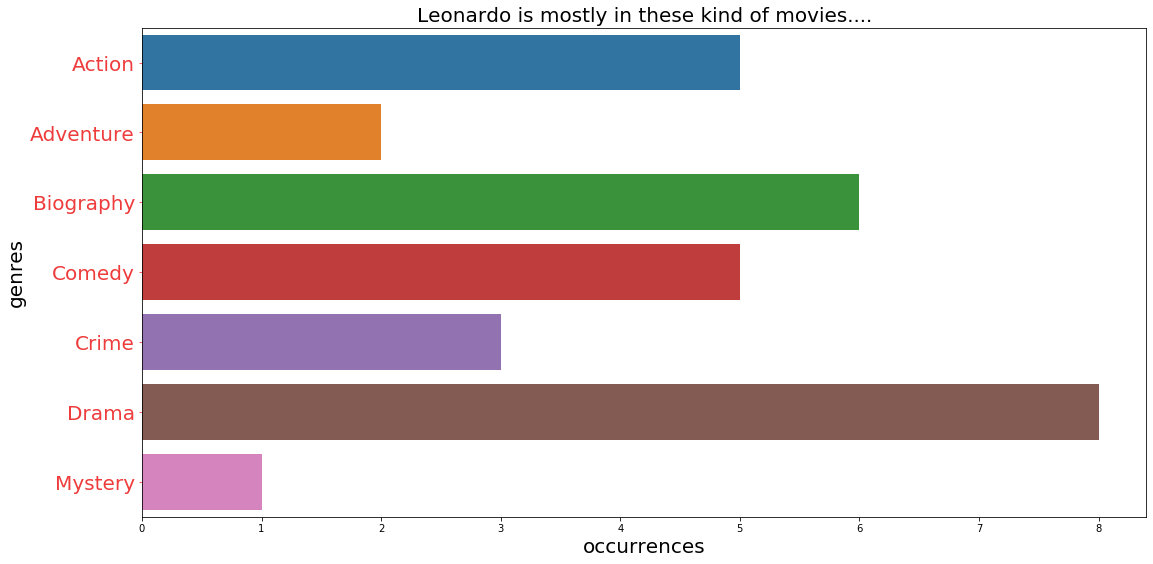

In [140]:
genre_count = df['genre1'].value_counts().sort_index()
df_gCount = pd.DataFrame({'genre1': genre_count.index, 'count': genre_count.values})
f, ax = plt.subplots(figsize=(18, 9))

sns.barplot(x = 'count', y = 'genre1', data= df_gCount)
ax.set_title('Leonardo is mostly in these kind of movies....', size =  20)
ax.set_xlabel('occurrences',size =  20)
ax.set_ylabel('genres',size =  20)
ax.tick_params(axis='y', colors='#EE3B3B', labelsize=20)


plt.show()

In [ ]:
df_gCount

<BarContainer object of 7 artists>

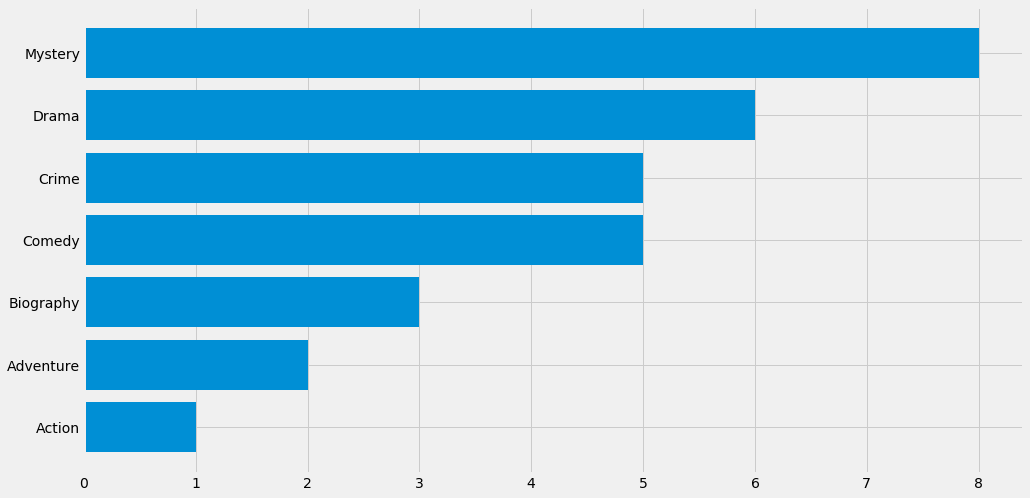

In [152]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_gCount['genre1'], df_gCount['count'].sort_values())

In [153]:
df

,title,rating,boxoffice,genre,genre1,genre2,genre3,genre_count
0,Titanic,7.8,$2.129 M.,"Drama, Romance",Drama,Romance,None,NaN
1,Inception,8.8,$826 M.,"Action, Adventure, Sci-Fi",Action,"Adventure,",Sci-Fi,NaN
2,The Revenant,8.0,$519 M.,"Action, Adventure, Biography",Action,"Adventure,",Biography,NaN
3,Django Unchained,8.4,$425 M.,"Drama, Western",Drama,Western,None,NaN
4,The Wolf of Wall Street,8.2,$392 M.,"Biography, Crime, Drama",Biography,"Crime,",Drama,NaN
5,Catch Me If You Can,8.1,$352 M.,"Biography, Crime, Drama",Biography,"Crime,",Drama,NaN
6,The Great Gatsby,7.3,$351 M.,"Drama, Romance",Drama,Romance,None,NaN
7,Once Upon a Time in Hollywood,8.0,$345 M.,"Comedy, Drama",Comedy,Drama,None,NaN
8,Shutter Island,8.1,$295 M.,"Mystery, Thriller",Mystery,Thriller,None,NaN
9,The Departed,8.5,$290 M.,"Crime, Drama, Thriller",Crime,"Drama,",Thriller,NaN


In [165]:
genre_count = df.groupby(['genre1', 'boxoffice']).sum().sort_index()


In [166]:
genre_count

rating  genre_count
genre1    boxoffice                     
Action    $115 M.       7.1          0.0
          $183 M.       6.5          0.0
          $19 M.        6.4          0.0
          $519 M.       8.0          0.0
          $826 M.       8.8          0.0
Adventure $144 M.       6.7          0.0
          $171 M.       8.0          0.0
Biography $2 M.         7.3          0.0
          $214 M.       7.5          0.0
          $352 M.       8.1          0.0
          $392 M.       8.2          0.0
          $4 M.         7.3          0.0
          $85 M.        6.5          0.0
Comedy    $0 M.        11.9          0.0
          $345 M.       8.0          0.0
          $5 M.         6.3          0.0
          N/A           4.4          0.0
Crime     $0 M.         7.4          0.0
          $194 M.       7.5          0.0
          $290 M.       8.5          0.0
Drama     $10 M.        7.8          0.0
          $13 M.        6.7          0.0
          $148 M.       6.7          0.0
          $2 M.         5.4          0.0
          $2.129 M.     7.8          0.0
          $351 M.       7.3          0.0
          $425 M.       8.4          0.0
          $75 M.        7.3          0.0
Mystery   $295 M.       8.1          0.0

In [167]:

df_gybox = genre_count.pivot_table(index=['genre'], columns=['rating'], values='boxoffice', aggfunc=np.mean)

f, [axA, axB] = plt.subplots(figsize=(27, 11), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gybox, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
axA.set_title('.: budget x genre x year :.')
axA.set_xlabel('rating')
axA.set_ylabel('genres')
axB.set_title('.: revenue x genre x year :.')
axB.set_xlabel('years')
axB.set_ylabel('genres')
plt.show()

KeyError: 'boxoffice'

In [ ]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

In [45]:
cnx = mysql.connector.connect(
    host = config2.host,
    user = config2.user,
    passwd = config2.password,
    database = db_name
)
cursor = cnx.cursor()
query = "SELECT * FROM Leonardo.imdbfilms JOIN Leonardo.thenumbers on Leonardo.imdbfilms.title = Leonardo.thenumbers.title  "
    
cursor.execute(query)

rows = cursor.fetchall()
table1 =  rows

In [46]:
table1

[('Blood Diamond',
  8,
  '$171 M.',
  0,
  '171 ',
  'Adventure, Drama, Thriller',
  'Blood Diamond',
  datetime.datetime(2006, 12, 8, 0, 0),
  57377916,
  114000000,
  171377916),
 ('Body of Lies',
  7,
  '$115 M.',
  0,
  '115 ',
  'Action, Drama, Thriller',
  'Body of Lies',
  datetime.datetime(2008, 10, 10, 0, 0),
  39394666,
  79161864,
  118556530),
 ('Catch Me If You Can',
  8,
  '$352 M.',
  0,
  '352 ',
  'Biography, Crime, Drama',
  'Catch Me if You Can',
  datetime.datetime(2002, 12, 25, 0, 0),
  164606800,
  191005491,
  355612291),
 ('Celebrity',
  6,
  '$5 M.',
  0,
  '5 ',
  'Comedy, Drama',
  'Celebrity',
  datetime.datetime(1998, 11, 20, 0, 0),
  5078660,
  1121340,
  6200000),
 ('Django Unchained',
  8,
  '$425 M.',
  0,
  '425 ',
  'Drama, Western',
  'Django Unchained',
  datetime.datetime(2012, 12, 25, 0, 0),
  162805434,
  287142889,
  449948323),
 ('Gangs of New York',
  8,
  '$194 M.',
  0,
  '194 ',
  'Crime, Drama',
  'Gangs of New York',
  datetime.datetime(